In [104]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt




In [105]:
df = pd.read_csv(r"C:\Users\User\Downloads\fake_account.csv")

In [106]:
df.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [107]:
df['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [109]:
df['profile pic'] = le.fit_transform(df['profile pic'])

In [110]:
df['profile pic']

0      1
1      1
2      1
3      1
4      1
      ..
571    1
572    1
573    1
574    1
575    1
Name: profile pic, Length: 576, dtype: int64

In [111]:
df['name==username'] = le.fit_transform(df['name==username'])

In [112]:
df['name==username']

0      0
1      0
2      0
3      0
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: name==username, Length: 576, dtype: int64

In [113]:
df.shape

(576, 12)

In [114]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [115]:
df['private'].value_counts()

0    356
1    220
Name: private, dtype: int64

In [116]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [117]:
X = df.drop(columns='fake', axis=1)
Y = df['fake']

In [118]:
print(X)
print(Y)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#  FIRST PARAMETER OPTIMIZATION


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=23)

In [121]:
X_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
498,0,0.28,1,0.24,0,0,0,0,0,86,0
156,1,0.00,3,0.00,0,0,0,0,36,1204,2928
478,0,0.36,1,0.00,0,0,0,0,8,39,17
298,0,0.33,1,0.00,0,0,0,0,0,10,18
496,0,0.27,1,0.00,0,0,0,0,0,16,0


In [122]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [123]:
model = SVC()


In [124]:
model.fit(X_train, Y_train)

SVC()

In [125]:
### Training without standard scalar

In [126]:
prediction = model.predict(X_train)

In [127]:
print(prediction)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [128]:
matrix = classification_report(Y_train, prediction)

In [129]:
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       233
           1       0.50      1.00      0.67       227

    accuracy                           0.51       460
   macro avg       0.75      0.52      0.37       460
weighted avg       0.75      0.51      0.37       460



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


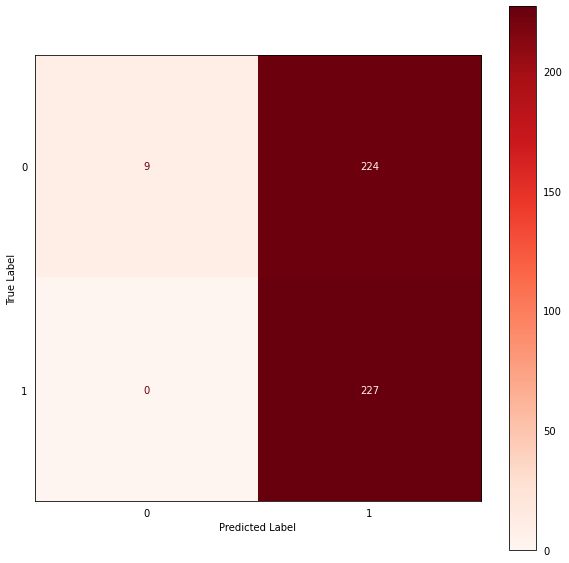

In [130]:
matrix_plot = plot_confusion_matrix(model, X_train, Y_train, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for SVM:  0.5193133047210301


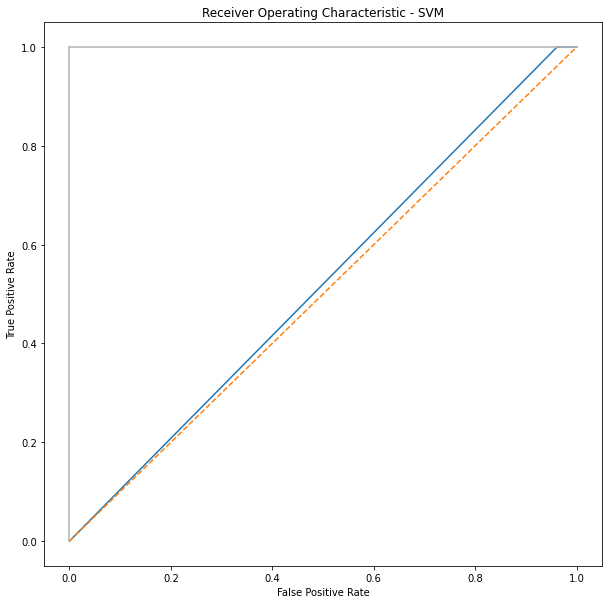

In [131]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train, prediction)
print('roc_auc_score for SVM: ', roc_auc_score(Y_train, prediction))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)

In [33]:
model = SVC()


In [34]:
###Training with standard scalar

In [35]:
model.fit(X_train, Y_train)

SVC()

In [36]:
prediction = model.predict(X_train)

In [37]:
print(prediction)

[1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0]


In [38]:
matrix = classification_report(Y_train, prediction)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       233
           1       0.94      0.89      0.91       227

    accuracy                           0.92       460
   macro avg       0.92      0.91      0.92       460
weighted avg       0.92      0.92      0.92       460



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


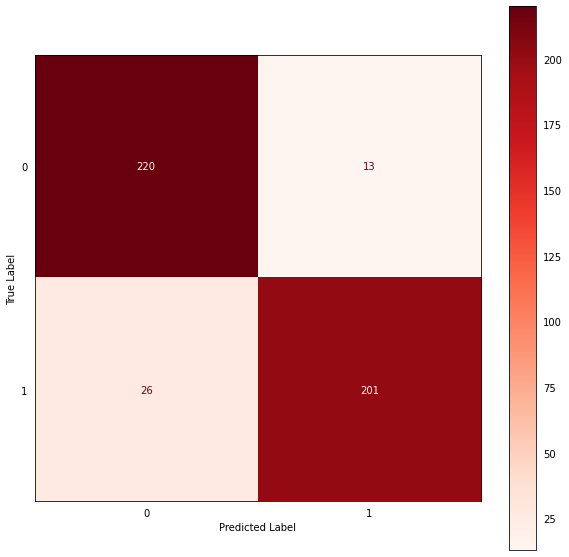

In [42]:
matrix_plot = plot_confusion_matrix(model, X_train, Y_train, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for SVM:  0.9148342818248851


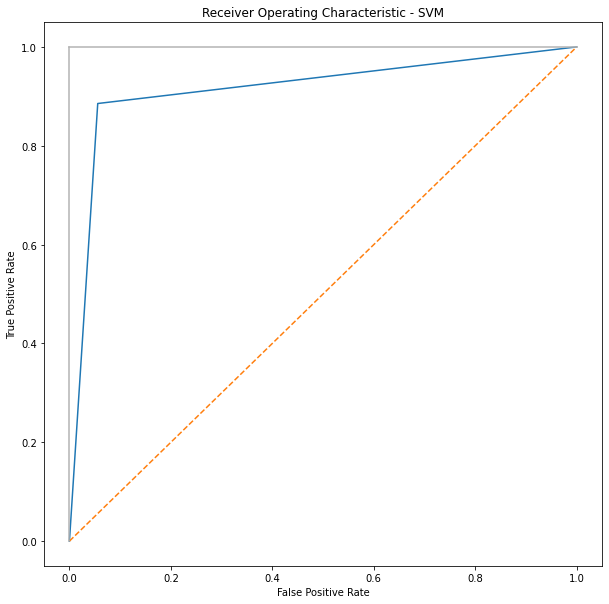

In [45]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train, prediction)
print('roc_auc_score for SVM: ', roc_auc_score(Y_train, prediction))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SECOND PARAMETER OPTIMIZATION

In [93]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=23)

In [94]:
X_train1.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
179,1,0.09,2,0.00,0,0,0,0,80,1298,407
534,1,0.33,2,0.22,0,0,0,0,8,210,1543
478,0,0.36,1,0.00,0,0,0,0,8,39,17
463,0,0.67,1,0.00,0,0,0,1,0,7,14
481,0,0.33,1,0.00,0,0,0,0,0,85,638


In [95]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [96]:
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=10)

In [97]:
select.fit(X_train1, Y_train1)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [98]:
x_train_selected = select.transform(X_train1)

In [99]:
model = LogisticRegression()

In [100]:
model.fit(x_train_selected, Y_train1)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
prediction1 = model.predict(x_train_selected)

In [102]:
print(prediction1)

[0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1]


In [103]:
matrix = classification_report(Y_train1, prediction1)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       230
           1       0.91      0.91      0.91       230

    accuracy                           0.91       460
   macro avg       0.91      0.91      0.91       460
weighted avg       0.91      0.91      0.91       460



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


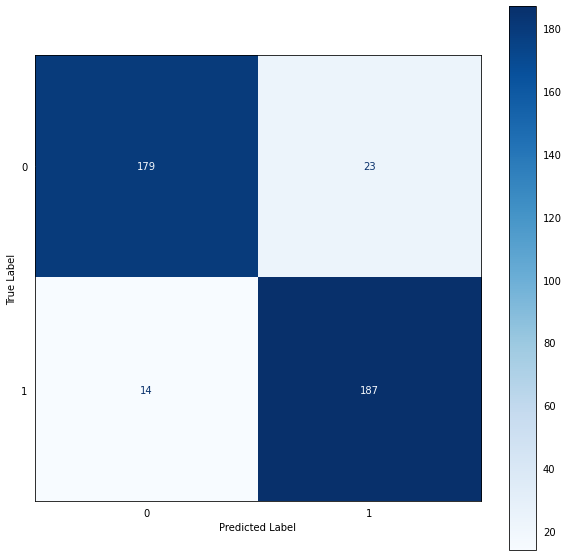

In [84]:
matrix_plot = plot_confusion_matrix(model, x_train_selected, Y_train1, cmap=plt.cm.Blues)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

In [68]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test1, prediction1)
print('roc_auc_score for SVM: ', roc_auc_score(Y_test1, prediction))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [173, 403]

In [185]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [186]:
X_train1 = sc.fit_transform(X_train1)

In [187]:
###Training with standard scalar

In [188]:
model.fit(X_train1, Y_train1)

LogisticRegression()

In [189]:
prediction = model.predict(X_train1)
print(prediction)

[1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1]


In [190]:
matrix = classification_report(Y_train1, prediction)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       202
           1       0.95      0.89      0.92       201

    accuracy                           0.92       403
   macro avg       0.92      0.92      0.92       403
weighted avg       0.92      0.92      0.92       403



# THIRD PARAMETER OPTIMIZATION

In [191]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=23)

In [86]:
X_train2.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
222,1,0.00,1,0.00,0,0,0,0,389,4347,748
475,1,0.67,1,0.00,0,0,0,0,2,218,792
348,1,0.89,1,0.89,0,0,0,1,124,15,305
195,1,0.14,2,0.00,0,0,0,1,18,318,523
515,0,0.10,0,0.00,0,0,0,0,0,37,4


In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train2, Y_train2)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
prediction2 = model.predict(X_train2)

In [90]:
print(prediction2)

[0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 

In [91]:
matrix = classification_report(Y_train2, prediction2)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       259
           1       0.92      0.93      0.92       259

    accuracy                           0.92       518
   macro avg       0.92      0.92      0.92       518
weighted avg       0.92      0.92      0.92       518



In [3]:
matrix_plot = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [93]:
X_train2 = sc.fit_transform(X_train2)

In [94]:
###Training with standard scalar

In [95]:
model.fit(X_train2, Y_train2)

LogisticRegression()

In [96]:
prediction = model.predict(X_train2)
print(prediction)

[0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 

In [97]:
matrix = classification_report(Y_train2, prediction2)
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       259
           1       0.92      0.93      0.92       259

    accuracy                           0.92       518
   macro avg       0.92      0.92      0.92       518
weighted avg       0.92      0.92      0.92       518

